# TOOLS for Hologram reconstruction

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 8th 2021

In [1]:
import ipywidgets as widgets
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

# Constants

## Hologram recording 

In [2]:
Z=200 # mm, distance between hologram and source plane

In [3]:
x_A=0 # mm, position of the source A
y_A=0 # mm, 

In [4]:
x_B=20 ## mm, position of the source B that will become the first order
y_B=0 ## mm

In [5]:
wl0=0.639e-3 ## recording wavelength in mm

In [6]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

## Function

In [7]:
def dd(x,y,x0,y0):
    """
    d_A(x,y,x0,y0) : distance between the point(x,y) on the hologram to the source of coordinate (x0,y0,Z)
    """
    
    dist = np.sqrt((x-x0)**2+(y-y0)**2+Z**2)
    
    return dist

In [8]:
def dd_diff(x,y):
    """
    d_ddiff(x,y) : distance difference between the two sources
    """
    dd_diff=dd(x,y,x_A,y_A)-dd(x,y,x_B,y_B)
    return dd_diff

In [9]:
def dd_phi(x,y):
    """
    dd_phase(x,y) : phase difference at point x,y on CCD
    """
    return 2*np.pi/wl0*dd_diff(x,y)

In [10]:
def interf_pattern(x,y):
    return 0.5*(np.cos(dd_phi(x,y))+1)

# plot slice

In [11]:
X=np.linspace(XMIN,XMAX,NPIX)

In [12]:
I0=interf_pattern(X,0)

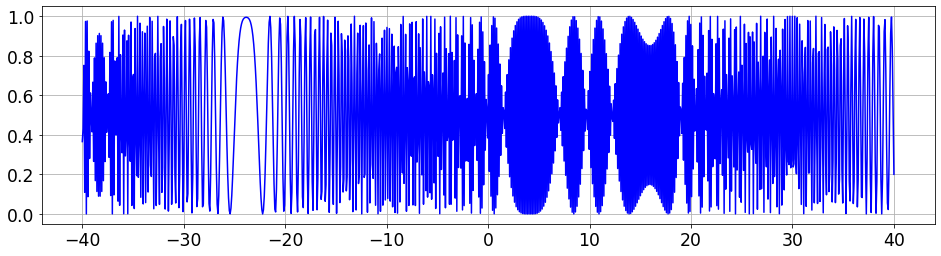

In [13]:
plt.plot(X,I0,'b-')
plt.grid()

# Mesh grid

In [14]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=True)

In [15]:
I1=dd_phi(XX,YY)
I2=interf_pattern(XX,YY)

# Contour level of constant phase difference

<ipython-input-16-94ce32818fda>:5: UserWarning: The following kwargs were not used by contour: 'lw'
  h1 = ax.contour(X,Y,ZZ,levels=50,colors="w",lw=1)


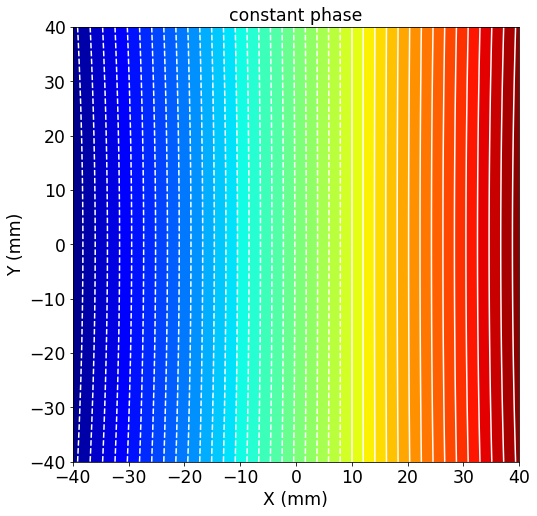

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ZZ = I1
h = ax.contourf(X,Y,ZZ,levels=50,cmap="jet")
h1 = ax.contour(X,Y,ZZ,levels=50,colors="w",lw=1)
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_title("constant phase")
plt.show()

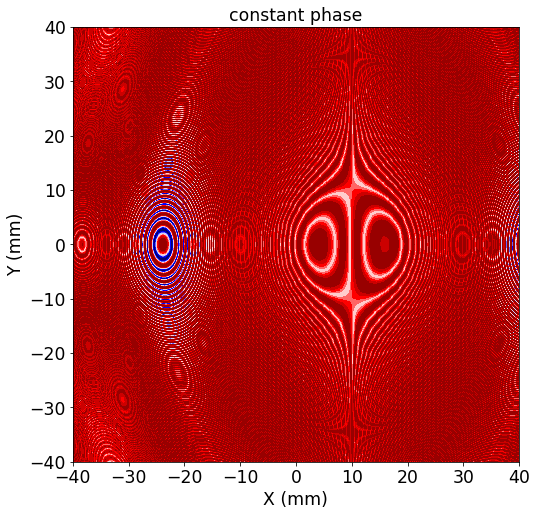

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ZZ = I2
h = ax.contourf(X,Y,ZZ,levels=10,cmap="seismic")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_title("constant phase")
plt.show()

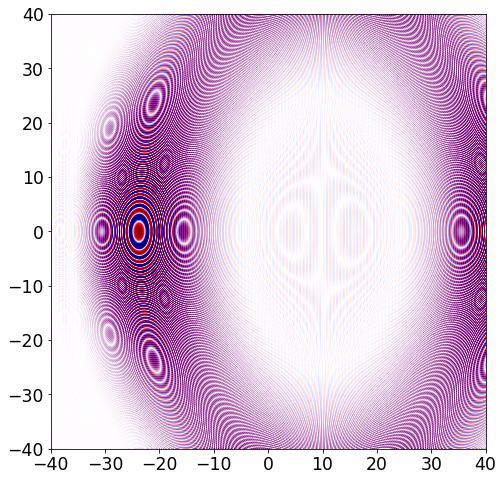

In [18]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(I2,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))

# Comput angles of lines

In [19]:
V,U=np.gradient(I1)

In [20]:
Norm=np.sqrt(U**2+V**2)
U=U/Norm
V=V/Norm

In [21]:
eps=1e-12
V=np.where(np.abs(V)<eps,eps,V)
U=np.where(np.abs(U)<eps,eps,U)
tanAngle=-  V/U
Angle=- 180/np.pi*np.arctan(V/U)

## Plot angles of spectra

Text(0.5, 1.0, 'tangent Angle')

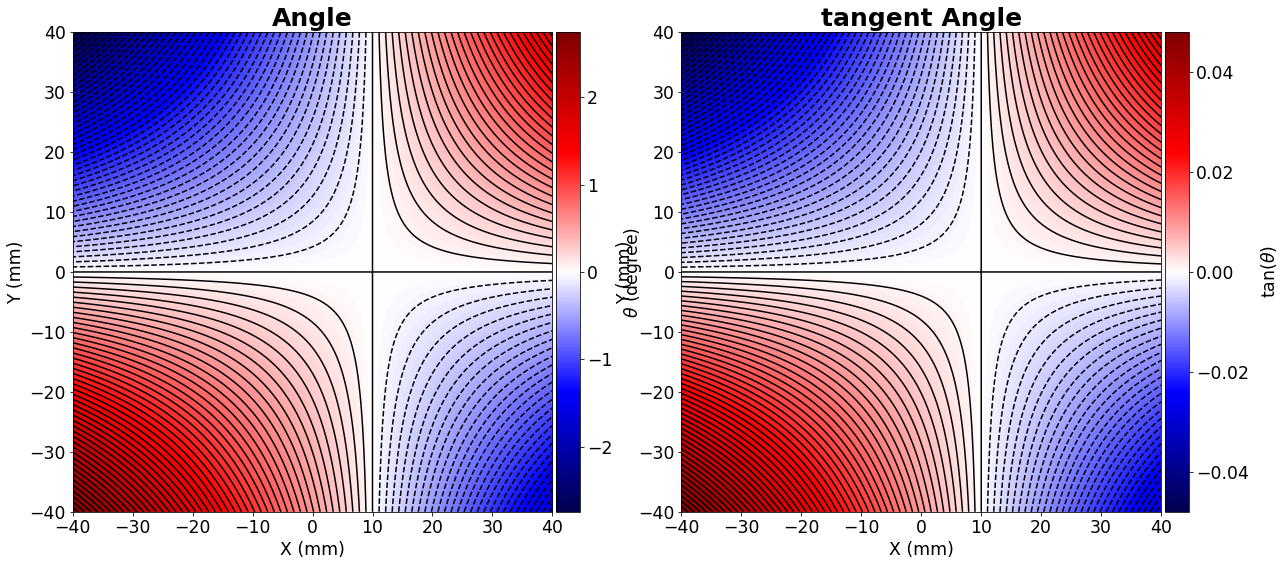

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Angle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Angle,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("Angle",fontweight="bold",fontsize=25)

ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(tanAngle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,tanAngle,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\tan(\\theta)$', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("tangent Angle",fontweight="bold",fontsize=25)


# Analytical functions for angles

In [23]:
def z_angle(x,y):
    delta=x_B-x_A
    return -180./np.pi*np.arctan(delta*y*(delta-2*x)/8/delta/Z**2)

In [24]:
def z_angleall(x,y):
    
    dA=dd(x,y,x_A,y_A)
    dB=dd(x,y,x_B,y_B)
    
    DxDy=(dB*(y-y_A)-dA*(y-y_B))/(dB*(x-x_A)-dA*(x-x_B))
    return -180./np.pi*np.arctan(DxDy)

In [25]:
Z_Ang=z_angle(XX, YY)
Z_Angall=z_angleall(XX, YY)

## Plot angles

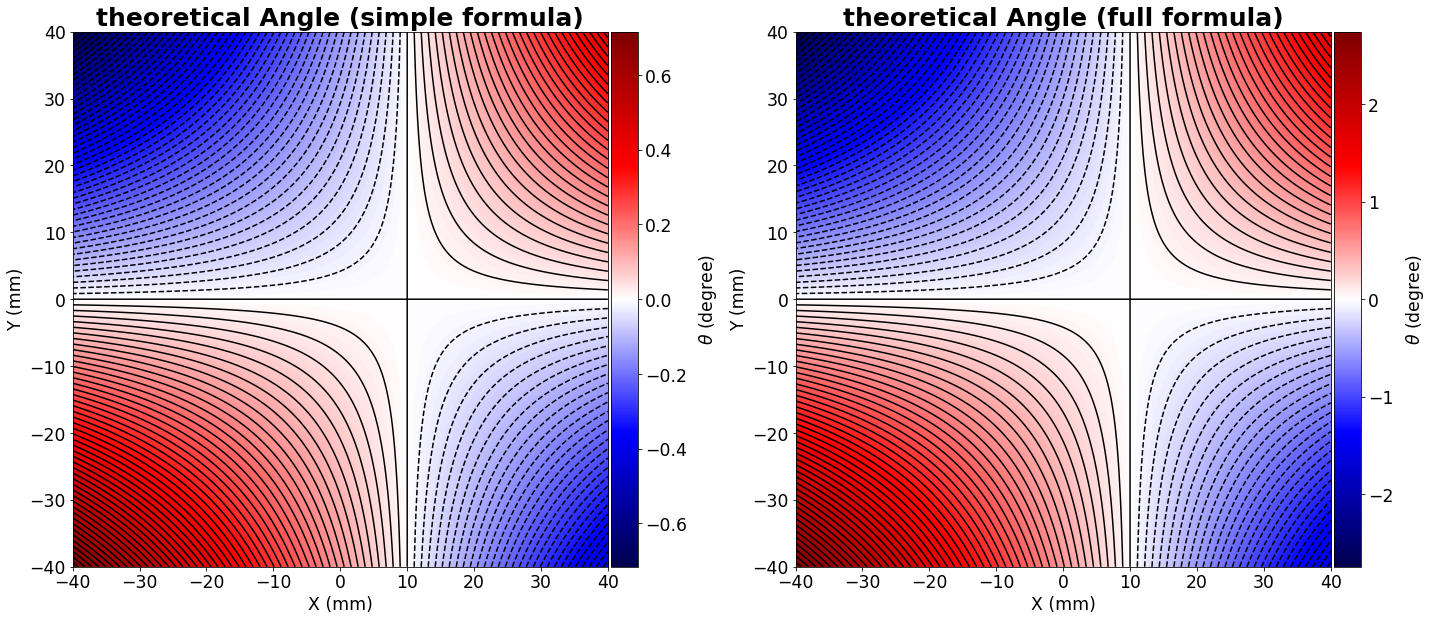

In [26]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("theoretical Angle (simple formula)",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_Angall,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,Z_Angall,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("theoretical Angle (full formula)",fontweight="bold",fontsize=25)

plt.tight_layout()
plt.show()

# Simulation and likelihood

## Random points

In [27]:
NumberofPoints=50

In [28]:
Nxsim=np.random.randint(NPIX, size=(NumberofPoints))
Nysim=np.random.randint(NPIX, size=(NumberofPoints))

<ipython-input-29-3f1a22310b52>:9: UserWarning: The following kwargs were not used by contour: 'linecolor'
  h1 = ax1.contour(X,Y,Angle,levels=100,linecolor='k')


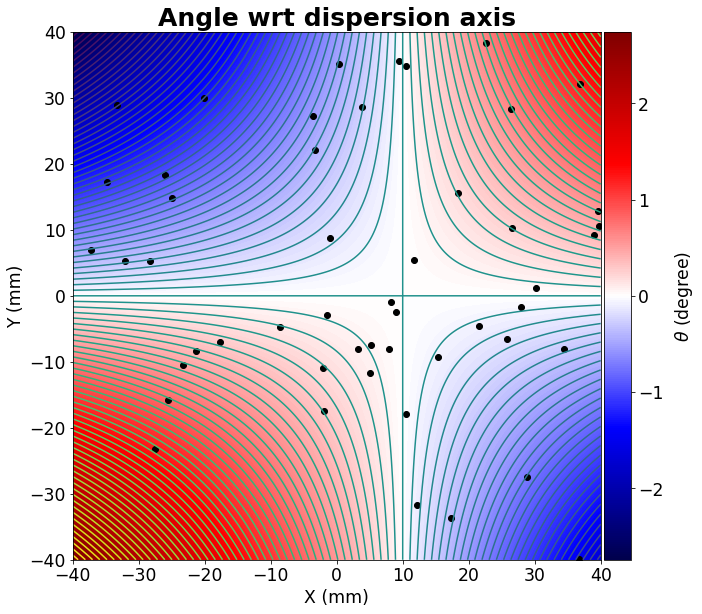

In [29]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Angle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Angle,levels=100,linecolor='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("Angle wrt dispersion axis",fontweight="bold",fontsize=25)

ax1.scatter(X[Nxsim],Y[Nysim],marker="o",color="k")

In [30]:
def lnlikelihood(Xdata,Ydata,sig=0.05):
    """
    Chi2 per degree of freedom
    
    """
    
    chi2=0
    N=len(Xdata)
    chi2=np.zeros((NPIX,NPIX))
    deltax=x_B-x_A
    deltay=y_B-y_A
    
    for idx in np.arange(N):
        
        dA=dd(Xdata[idx],Ydata[idx],XX-deltax/2,YY-deltay/2)
        dB=dd(Xdata[idx],Ydata[idx],XX+deltax/2,YY+deltay/2)
    
        DxDy=(dB*(Ydata[idx]-(YY-deltay/2))-dA*(Ydata[idx]-(YY+deltay/2)))/(dB*(Xdata[idx]-(XX-deltax/2))-dA*(Xdata[idx]-(XX+deltax/2)))
        
        angle_mod = -180./np.pi*np.arctan(DxDy)
        
        angle_mes=z_angleall(Xdata[idx],Ydata[idx])+np.random.normal(loc=0,scale=sig)
    
        chi2+=(angle_mod-angle_mes)**2/sig**2
        
    return chi2/(N-2) 

In [31]:
chi2=lnlikelihood(X[Nxsim],Y[Nysim])

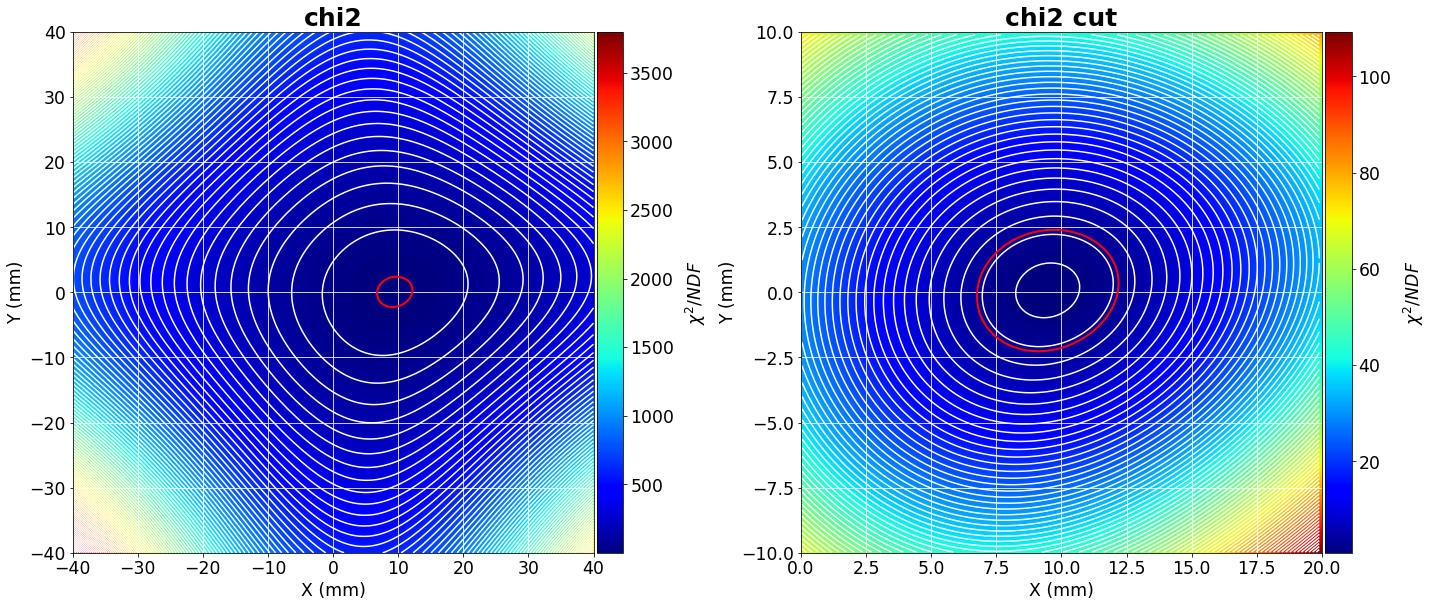

In [32]:
fig = plt.figure(figsize=(20,10))


ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
im1=ax1.imshow(chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,chi2,levels=100,colors='w')
h1b = ax1.contour(X,Y,chi2,levels=[2.30+chi2.min()],colors='r',linewidths=2)
cbar1=fig.colorbar(im1,cax=cax1)
cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2",fontweight="bold",fontsize=25)
ax1.grid(color="w")


ax2 = fig.add_subplot(122)
xmin=0
xmax=20
ymin=-10
ymax=10
ibinx=np.where(np.logical_and(X>=xmin,X<=xmax))[0]
ibiny=np.where(np.logical_and(Y>=ymin,X<=ymax))[0]
chi2_cut=chi2[ibiny.min():ibiny.max(), ibinx.min():ibinx.max()]
X_cut=X[ibinx.min():ibinx.max()]
Y_cut=X[ibiny.min():ibiny.max()]


divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
im2=ax2.imshow(chi2_cut,origin="lower",cmap="jet",extent=(xmin,xmax,ymin,ymax))
h2 = ax2.contour(X_cut,Y_cut,chi2_cut,levels=100,colors='w')
h2b = ax2.contour(X_cut,Y_cut,chi2_cut,levels=[2.30+chi2_cut.min()],colors='r',linewidths=2)
cbar2=fig.colorbar(im2,cax=cax2)
cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("chi2 cut",fontweight="bold",fontsize=25)
ax2.grid(color="w")

plt.tight_layout()
plt.show()

In [33]:
ibinx=np.where(np.logical_and(X>0,X<20))[0]
ibiny=np.where(np.logical_and(Y>-10,X<10))[0]

## Regular grid

In [34]:
XData=np.arange(-10,31,5)
YData=np.arange(-30,31,5)

In [35]:
XXData, YYData = np.meshgrid(XData, YData)

<ipython-input-36-749dc4324c07>:9: UserWarning: The following kwargs were not used by contour: 'linecolor'
  h1 = ax1.contour(X,Y,Angle,levels=100,linecolor='k')


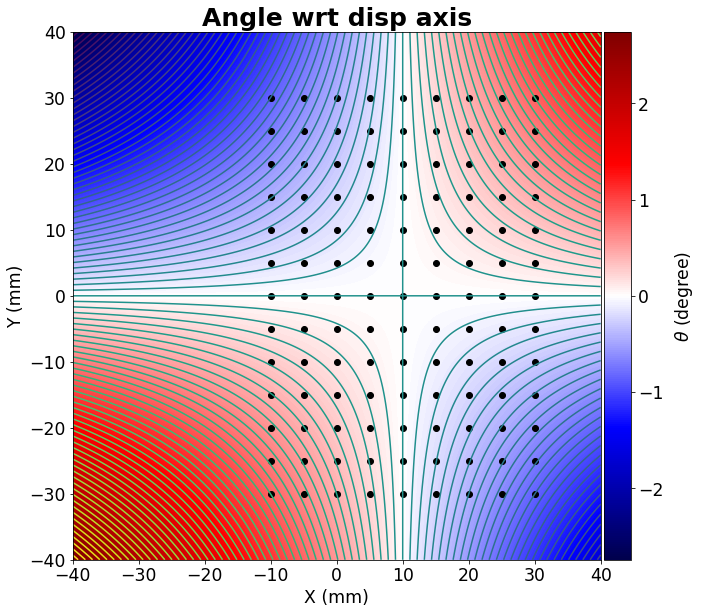

In [36]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Angle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Angle,levels=100,linecolor='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("Angle wrt disp axis",fontweight="bold",fontsize=25)

ax1.scatter(XXData.flatten(),YYData.flatten(),marker="o",color="k")

In [37]:
chi2=lnlikelihood(XXData.flatten(),YYData.flatten())

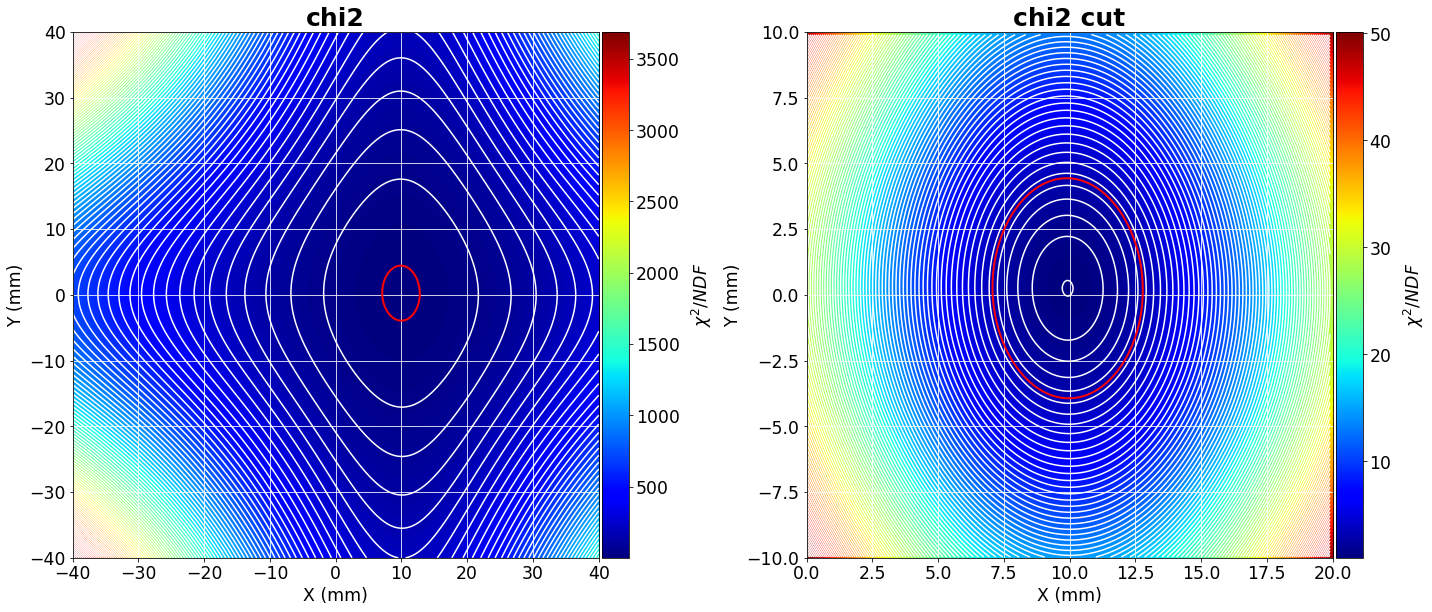

In [38]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))

h1 = ax1.contour(X,Y,chi2,levels=100,colors='w')
h1b = ax1.contour(X,Y,chi2,levels=[2.30+chi2.min()],colors='r',linewidths=2)
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2",fontweight="bold",fontsize=25)

ax1.grid(color="w")


ax2 = fig.add_subplot(122)
xmin=0
xmax=20
ymin=-10
ymax=10
ibinx=np.where(np.logical_and(X>=xmin,X<=xmax))[0]
ibiny=np.where(np.logical_and(Y>=ymin,X<=ymax))[0]
chi2_cut=chi2[ibiny.min():ibiny.max(), ibinx.min():ibinx.max()]
X_cut=X[ibinx.min():ibinx.max()]
Y_cut=X[ibiny.min():ibiny.max()]


divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
im2=ax2.imshow(chi2_cut,origin="lower",cmap="jet",extent=(xmin,xmax,ymin,ymax))
h2 = ax2.contour(X_cut,Y_cut,chi2_cut,levels=100,colors='w')
h2b = ax2.contour(X_cut,Y_cut,chi2_cut,levels=[2.30+chi2_cut.min()],colors='r',linewidths=2)
cbar2=fig.colorbar(im2,cax=cax2)
cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("chi2 cut",fontweight="bold",fontsize=25)
ax2.grid(color="w")

plt.tight_layout()
plt.show()